<a href="https://colab.research.google.com/github/Almas-21321012/cardiohealth/blob/main/business_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Health Analysis Report

# 1. Introduction
## Purpose of Report

The purpose of this report is to analyze a cardiovascular health dataset to uncover insights related to demographic, clinical, and lifestyle factors contributing to cardiovascular disease. We will perform data extraction, cleaning, analysis, and visualization using Python.


## Problem Statement

This analysis aims to explore how various demographic, clinical, and lifestyle factors contribute to the presence of cardiovascular disease (CVD) in individuals. We will focus on combinations of gender, smoking status, age, cholesterol levels, and blood pressure to identify significant risk factors for CVD.

## 2. Code Implementation
## Set Up the Environment

### Import Libraries

- sqlite3 (to connect to the database)
- pandas (for data manipulation)
- numpy (for numerical operations)
- matplotlib (for visualization)

In [9]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extract Data from SQLite Database
- Connect to the cardiohealth.db SQLite database.
- Query the data from the medical_examination table.

In [10]:
# Connect to the SQLite database
db_path = '/content/cardiohealth.db'
conn = sqlite3.connect(db_path)

In [11]:
# Function to load data from SQL into a Pandas DataFrame
def load_data(query, conn):
    return pd.read_sql(query, conn)

## Access the Database

In [12]:
# Get the list of tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = load_data(tables_query, conn)
print(tables)

                  name
0  medical_examination


### Dataset Information
The key columns (features) in the provided dataset from the SQLite database:

#### Demographic Factors:
- age: Age in days.
- gender: Gender (1 for female, 2 for male).
#### Clinical Factors:
- cholesterol: Cholesterol level (1 for normal, 2 for above - normal, 3 for well above normal).
- gluc: Glucose level (1 for normal, 2 for above normal, 3 for well above normal).
- ap_hi: Systolic blood pressure.
- ap_lo: Diastolic blood pressure.
##### Lifestyle Factors:
-smoke: Smoking status (0 for non-smoker, 1 for smoker).
-alco: Alcohol consumption (0 for non-drinker, 1 for drinker).
-active: Physical activity status (0 for inactive, 1 for active).
#### Target Variable:
- cardio: Cardiovascular disease presence (0 for no disease, 1 for disease).

In [14]:
# Show the schema of the table (assuming the table is named 'medical_examination')
table_name = 'medical_examination'
schema_query = f"PRAGMA table_info({table_name});"
schema = load_data(schema_query, conn)
print(schema)

    cid         name     type  notnull dflt_value  pk
0     0           id  INTEGER        0       None   0
1     1          age  INTEGER        0       None   0
2     2       gender  INTEGER        0       None   0
3     3       height  INTEGER        0       None   0
4     4       weight     REAL        0       None   0
5     5        ap_hi  INTEGER        0       None   0
6     6        ap_lo  INTEGER        0       None   0
7     7  cholesterol  INTEGER        0       None   0
8     8         gluc  INTEGER        0       None   0
9     9        smoke  INTEGER        0       None   0
10   10         alco  INTEGER        0       None   0
11   11       active  INTEGER        0       None   0
12   12       cardio  INTEGER        0       None   0


## Data Extraction and Manipulation

In [15]:
# Extract the necessary data from the database
data_query = f"SELECT * FROM {table_name};"
df = load_data(data_query, conn)

# Display the first few rows of the data
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Exploration
In this step, we explore the structure of the dataset, inspect the columns, check for missing values, and get an overview of the data using summary statistics.


In [16]:
# Check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [17]:
# Convert age from days to years for better readability
df['age_years'] = df['age'] // 365

In [18]:
# Check for missing values
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64


In [19]:
# If necessary, you can drop or fill missing values (for demonstration, we'll drop any nulls)
df_clean = df.dropna()

In [20]:
# Display summary statistics of the dataset
print(df_clean.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843    164.359229     74.205690   
std    28851.302323   2467.251667      0.477253      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      3.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

## Factor Combinations to Analyze

We need to analyze the combinations of demographic, clinical, and lifestyle factors. Below are some examples:

- One combination of a Demographic factor and a Lifestyle factor.
- One combination of a Demographic factor and a Clinical factor.
- Two combinations of Demographic, Clinical, and Lifestyle factors.
### Example choices:

1. Demographic + Lifestyle: Gender + Smoking
2. Demographic + Clinical: Age + Cholesterol
3. Demographic, Clinical, and Lifestyle: Age + Blood Pressure + Physical Activity

### 1. Demographic Factor + Lifestyle Factor: Gender + Smoking


<Axes: title={'center': 'Cardiovascular Disease by Gender and Smoking Status'}, xlabel='gender,smoke'>

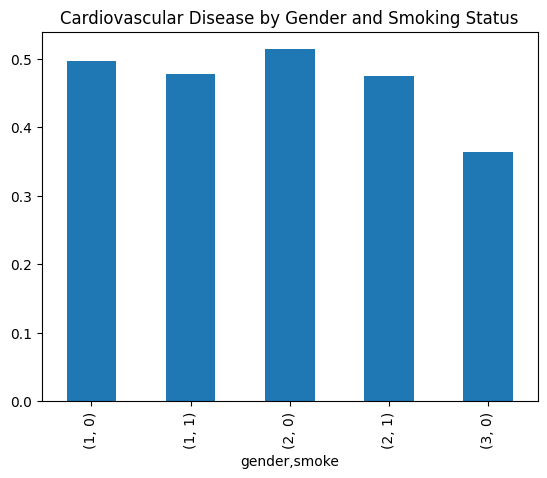

In [21]:
# Group data by gender and smoking status, and calculate the mean of cardio
gender_smoke_analysis = df.groupby(['gender', 'smoke'])['cardio'].mean()

# Visualize the results
gender_smoke_analysis.plot(kind='bar', title='Cardiovascular Disease by Gender and Smoking Status')

   gender  smoke    cardio
0       1      0  0.497103
1       1      1  0.477245
2       2      0  0.513893
3       2      1  0.474421
4       3      0  0.363636


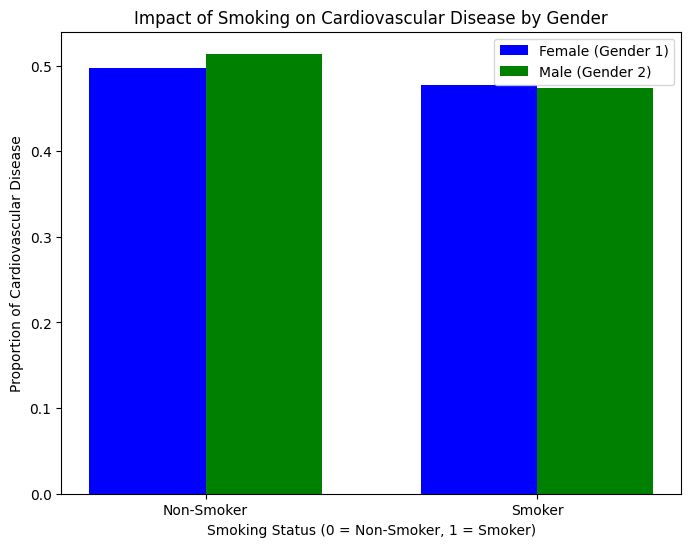

In [22]:
# Select relevant columns for Gender and Smoking analysis
df_gender_smoke = df[['gender', 'smoke', 'cardio']]

# Group the data by gender and smoking status and calculate the mean cardiovascular disease rate
grouped_data = df_gender_smoke.groupby(['gender', 'smoke'])['cardio'].mean().reset_index()

# Print the grouped data to inspect
print(grouped_data)

# Set up figure size
plt.figure(figsize=(8, 6))

# Set bar width and positions for grouped bars
bar_width = 0.35
index = np.arange(len(grouped_data['smoke'].unique()))  # Smoking status (0 or 1)

# Plot for each gender, adjusting positions to avoid overlap
gender_1_data = grouped_data[grouped_data['gender'] == 1]
gender_2_data = grouped_data[grouped_data['gender'] == 2]

plt.bar(index, gender_1_data['cardio'], bar_width, label='Female (Gender 1)', color='blue')
plt.bar(index + bar_width, gender_2_data['cardio'], bar_width, label='Male (Gender 2)', color='green')

# Add labels, title, and legend
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Proportion of Cardiovascular Disease')
plt.title('Impact of Smoking on Cardiovascular Disease by Gender')
plt.xticks(index + bar_width / 2, ['Non-Smoker', 'Smoker'])  # Labels for smoking status
plt.legend()

# Show the plot
plt.show()


In [23]:
# Example: Gender and Smoking Analysis
gender_smoking = df.groupby('gender')['smoke'].mean()

# Display the results
print(gender_smoking.head())

gender
1    0.017859
2    0.218907
3    0.000000
Name: smoke, dtype: float64


## 2. Demographic Factor + Clinical Factor: Age Group + Cholesterol


<ipython-input-24-e96509867bee>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cholesterol_analysis = df.groupby(['age_group', 'cholesterol'])['cardio'].mean()


<Axes: title={'center': 'Cardiovascular Disease by Age and Cholesterol'}, xlabel='age_group,cholesterol'>

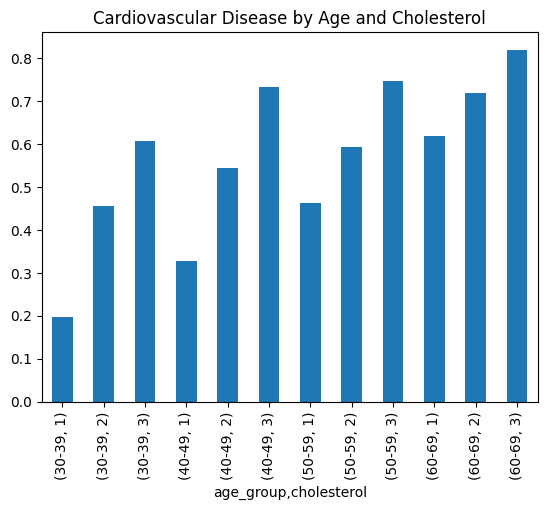

In [24]:
# Create age groups
df['age_group'] = pd.cut(df['age_years'], bins=[29, 39, 49, 59, 69], labels=['30-39', '40-49', '50-59', '60-69'])

# Group by age group and cholesterol levels
age_cholesterol_analysis = df.groupby(['age_group', 'cholesterol'])['cardio'].mean()

# Visualize the results
age_cholesterol_analysis.plot(kind='bar', title='Cardiovascular Disease by Age and Cholesterol')


    age_years  cholesterol    cardio
0          29            1  0.000000
1          30            1  0.000000
2          39            1  0.198675
3          39            2  0.454545
4          39            3  0.606557
..        ...          ...       ...
75         63            2  0.729858
76         63            3  0.838811
77         64            1  0.665147
78         64            2  0.755172
79         64            3  0.859116

[80 rows x 3 columns]


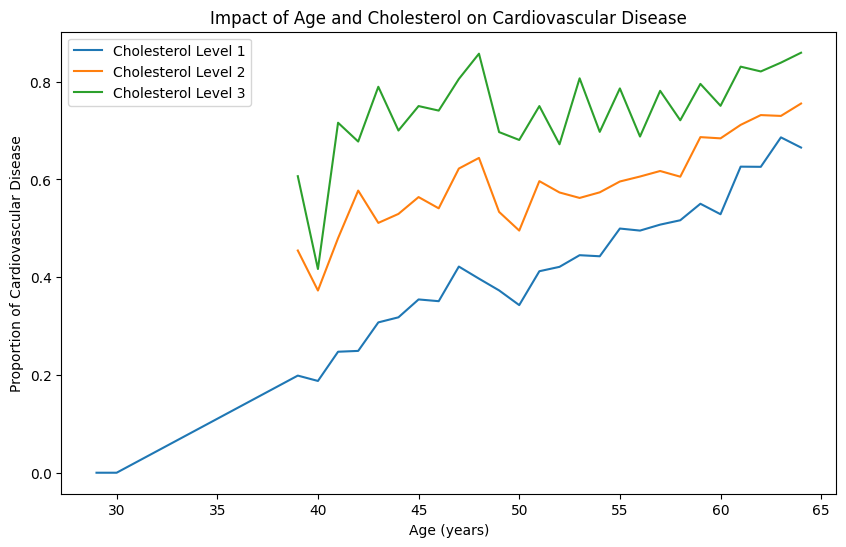

In [25]:
# Select relevant columns for Age and Cholesterol analysis
df_age_chol = df[['age_years', 'cholesterol', 'cardio']]

# Group the data by age and cholesterol levels, then calculate the mean cardiovascular disease rate
grouped_age_chol = df_age_chol.groupby(['age_years', 'cholesterol'])['cardio'].mean().reset_index()

# Print the grouped data to inspect
print(grouped_age_chol)

# Visualize the relationship using a bar chart
plt.figure(figsize=(10, 6))
for cholesterol_level in grouped_age_chol['cholesterol'].unique():
    subset = grouped_age_chol[grouped_age_chol['cholesterol'] == cholesterol_level]
    plt.plot(subset['age_years'], subset['cardio'], label=f'Cholesterol Level {cholesterol_level}')

plt.xlabel('Age (years)')
plt.ylabel('Proportion of Cardiovascular Disease')
plt.title('Impact of Age and Cholesterol on Cardiovascular Disease')
plt.legend()
plt.show()

In [26]:
# Example: Age and Cholesterol Analysis
age_cholesterol = df.groupby('age')['cholesterol'].mean()

# Display the results
print(age_cholesterol.head())


age
10798    1.0
10859    1.0
10878    1.0
10964    1.0
14275    3.0
Name: cholesterol, dtype: float64


## 3. Demographic + Clinical + Lifestyle Factors: Gender + Blood Pressure + Smoking


In this analysis, we'll represent how gender, blood pressure, and smoking together affect cardiovascular disease rates. We'll categorize the data based on:

- Demographic Factor: Gender (1 for Female, 2 for Male)
- Clinical Factor: Blood Pressure (Normal or High)
- Lifestyle Factor: Smoking (Non-smoker or Smoker)

<ipython-input-27-2dc56c0ed66a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_activity_analysis = df.groupby(['age_group', 'ap_hi', 'active'])['cardio'].mean()


<Axes: title={'center': 'Cardiovascular Disease by Age, Blood Pressure, and Physical Activity'}, xlabel='age_group,ap_hi,active'>

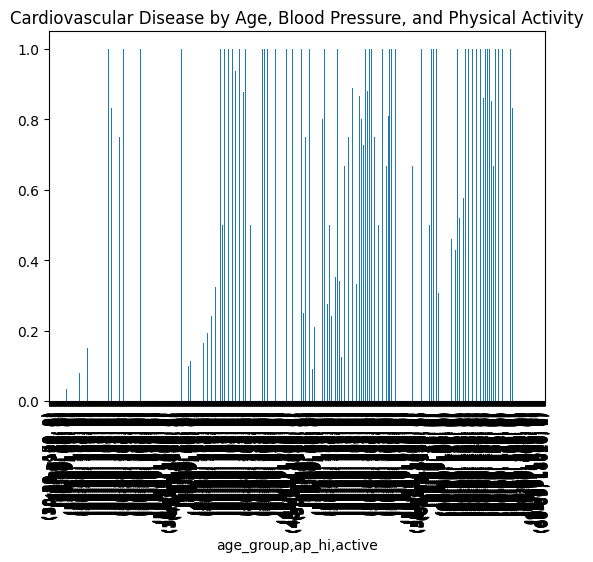

In [27]:
# Group by age group, blood pressure (ap_hi), and physical activity
bp_activity_analysis = df.groupby(['age_group', 'ap_hi', 'active'])['cardio'].mean()

# Visualize the results
bp_activity_analysis.plot(kind='bar', title='Cardiovascular Disease by Age, Blood Pressure, and Physical Activity')


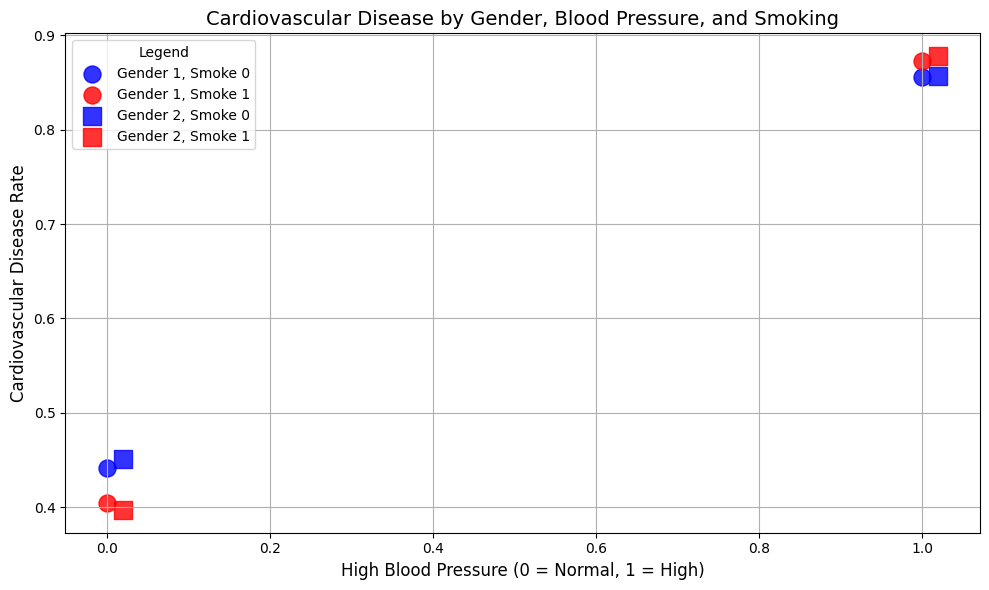

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Analyze the combination of Gender, Blood Pressure, and Smoking
df_clean['high_bp'] = np.where(df_clean['ap_hi'] > 140, 1, 0)  # Define high systolic BP
gender_bp_smoking = df_clean.groupby(['gender', 'high_bp', 'smoke'])['cardio'].mean().reset_index()

# Set up figure
plt.figure(figsize=(10, 6))

# Use different markers and colors for each combination of Gender and Smoking
markers = {1: 'o', 2: 's'}  # Circle for Gender 1 (Female), Square for Gender 2 (Male)
colors = {0: 'blue', 1: 'red'}  # Non-smoker (0) is blue, Smoker (1) is red

# Iterate over each gender
for gender in [1, 2]:
    subset = gender_bp_smoking[gender_bp_smoking['gender'] == gender]

    # Add jitter to high_bp values to separate overlapping points
    jitter = 0.02 * (gender - 1)

    for smoke in subset['smoke'].unique():
        sub_smoke = subset[subset['smoke'] == smoke]

        # Scatter plot with distinct markers for each gender and color for smoking status
        plt.scatter(sub_smoke['high_bp'] + jitter, sub_smoke['cardio'],
                    label=f'Gender {gender}, Smoke {smoke}',
                    s=150, marker=markers[gender], color=colors[smoke], alpha=0.8)

# Customize plot labels and title
plt.title('Cardiovascular Disease by Gender, Blood Pressure, and Smoking', fontsize=14)
plt.xlabel('High Blood Pressure (0 = Normal, 1 = High)', fontsize=12)
plt.ylabel('Cardiovascular Disease Rate', fontsize=12)

# Display legend
plt.legend(title='Legend')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Additional Visualization

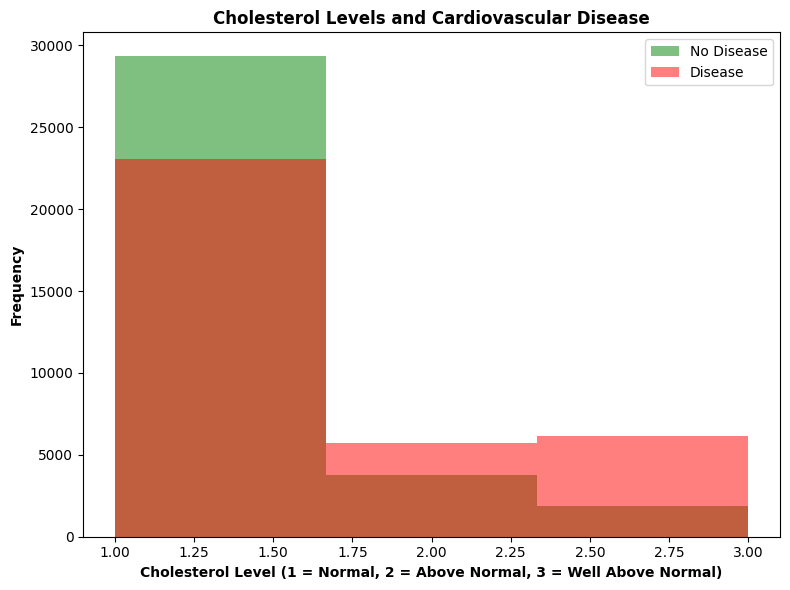

In [30]:
# Plot histograms for cholesterol levels in people with and without cardiovascular disease
plt.figure(figsize=(8,6))
plt.hist(df_clean[df_clean['cardio'] == 0]['cholesterol'], bins=3, alpha=0.5, label='No Disease', color='green')
plt.hist(df_clean[df_clean['cardio'] == 1]['cholesterol'], bins=3, alpha=0.5, label='Disease', color='red')

# Add labels, title, and legend
plt.title('Cholesterol Levels and Cardiovascular Disease', fontweight='bold')
plt.xlabel('Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


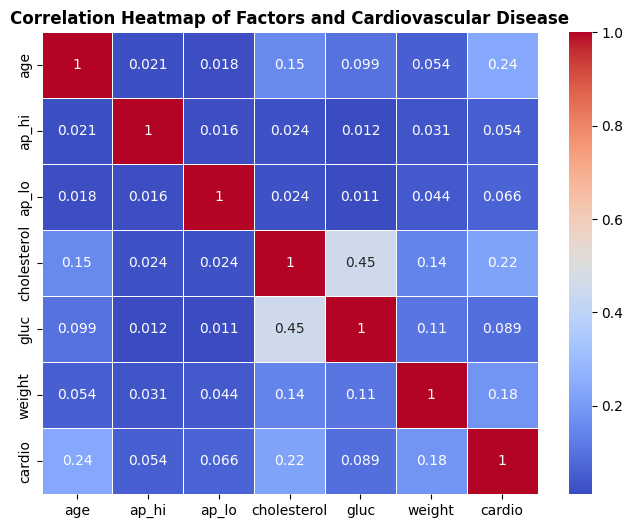

In [31]:
import seaborn as sns

# Select relevant columns for the correlation matrix
correlation_data = df_clean[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'weight', 'cardio']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Factors and Cardiovascular Disease', fontweight='bold')
plt.show()


In [32]:
# Calculate correlation matrix for selected factors and cardiovascular disease
correlation_data = df_clean[['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'weight', 'cardio']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Show the correlation matrix
print(corr_matrix['cardio'].sort_values(ascending=False))


cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
Name: cardio, dtype: float64


## Data Modeling

In [33]:
import statsmodels.api as sm

# Prepare the dataset by selecting the relevant features (independent variables) and the target variable (cardio)
X = df_clean[['age', 'ap_hi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]  # Independent variables
X = sm.add_constant(X)  # Add constant (intercept) for the regression model
y = df_clean['cardio']  # Target variable (0 = No disease, 1 = Disease)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the logistic regression results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.596219
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69992
Method:                           MLE   Df Model:                            7
Date:                Fri, 04 Oct 2024   Pseudo R-squ.:                  0.1398
Time:                        15:12:39   Log-Likelihood:                -41735.
converged:                       True   LL-Null:                       -48520.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.7332      0.098    -89.120      0.000      -8.925      -8.541
age             0.0001   3

In [34]:
from scipy.stats import chi2_contingency

# Create a contingency table for gender and cardiovascular disease
gender_contingency = pd.crosstab(df_clean['gender'], df_clean['cardio'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(gender_contingency)

# Print the result
print(f"Chi-Square Statistic: {chi2}, P-Value: {p}")


Chi-Square Statistic: 5.417193150480619, P-Value: 0.06663025167313794


## 3. Analysis and Insights

### Insights of visualization of 'Demographic + Lifestyle: Gender + Smoking':
1. Non-Smoker Males (Gender 2) have a higher cardiovascular disease rate (0.514) compared to non-smoker females (Gender 1, 0.497).
- This could indicate that, irrespective of smoking status, males have a slightly higher baseline risk of cardiovascular disease compared to females.
2. Smokers:
- Interestingly, female smokers (Gender 1, 0.477) have a lower cardiovascular disease rate compared to female non-smokers (0.497).
- Similarly, male smokers (Gender 2, 0.474) also show a lower cardiovascular disease rate compared to male 3. non-smokers (0.514).
- This pattern is unexpected because we typically associate smoking with a higher risk of cardiovascular disease. It could imply that other factors (such as age, blood pressure, or other lifestyle factors) are influencing the results here, or it could reflect anomalies in the dataset.
3. Gender 3 appears to have a lower cardiovascular disease rate (0.364), but it’s unclear what Gender 3 represents from this dataset (perhaps it's a data entry mistake or an additional category we need more context for).

### Recommendations for Analysis:
1. Investigate Gender 3: Determine what Gender 3 represents and if it should be included in the analysis.
2. Further Analyze the Smoking Effect: Since both males and females show a counterintuitive trend (lower cardiovascular disease rates in smokers than non-smokers), it’s important to check for other influencing variables, such as age, cholesterol levels, or blood pressure.
3. Perform Statistical Tests: To confirm whether these differences are statistically significant, a Chi-Square test could be useful to compare the proportions of cardiovascular disease between different groups (smokers vs non-smokers, males vs females).

## Insights of Demographic + Clinical: Age + Cholesterol

1. General Trend Across Age Groups:
The proportion of individuals with cardiovascular disease increases steadily with age, regardless of cholesterol levels. This is an expected result, as older age is one of the strongest risk factors for cardiovascular disease.
The graph shows a gradual increase in the cardiovascular disease rate as individuals move from their 30s to their 60s. For people with normal cholesterol levels (Cholesterol Level 1), the increase in cardiovascular disease prevalence is more gradual than for those with elevated cholesterol levels.
2. Impact of Cholesterol on Cardiovascular Disease:
Individuals with higher cholesterol levels (Cholesterol Level 2: Above Normal, and Cholesterol Level 3: Well Above Normal) consistently have higher rates of cardiovascular disease compared to those with Cholesterol Level 1 (Normal) across all age groups.
For individuals aged 40 and above, the gap between the cardiovascular disease rates of Cholesterol Level 3 and Cholesterol Level 1 becomes increasingly large. For example, by age 60, those with Cholesterol Level 3 have a cardiovascular disease rate of nearly 80-85%, whereas individuals with Cholesterol Level 1 have a disease rate of around 60-65%.
Cholesterol Level 3 (Well Above Normal) is particularly concerning for individuals in the 40-50 age range, where the graph shows a steep rise in cardiovascular disease rates.
3. Variability in the Younger Age Groups:
For younger individuals (ages 30-40), the graph shows more variability and fluctuations in cardiovascular disease rates, especially in those with Cholesterol Level 3. This may be due to the relatively smaller number of younger individuals experiencing cardiovascular disease, making the data more sensitive to individual cases.
In contrast, individuals with normal cholesterol (Cholesterol Level 1) have low and steady cardiovascular disease rates in their 30s and early 40s.
4. A Sharp Increase for Higher Cholesterol Levels in Middle Age:
In the 40-50 age group, individuals with Cholesterol Level 2 (Above Normal) and Cholesterol Level 3 experience a noticeable increase in cardiovascular disease prevalence. This suggests that middle-aged individuals with elevated cholesterol are at significant risk, and interventions to manage cholesterol at this age could be critical in preventing cardiovascular disease later in life.

## Recommendations and Further Analysis:
1. Target Cholesterol Management in Middle Age: Given the steep increase in cardiovascular disease rates for individuals with Cholesterol Levels 2 and 3 starting in their 40s, cholesterol management strategies should be emphasized for individuals in this age group.
Routine cholesterol checks and early interventions to lower cholesterol through diet, exercise, or medication could significantly reduce the risk of cardiovascular disease later in life.
2. Explore Other Contributing Factors: While age and cholesterol are strong predictors of cardiovascular disease, other factors such as blood pressure, smoking, and physical activity also contribute. Further analysis incorporating these variables would provide a more comprehensive understanding of cardiovascular disease risk.
3. Public Health Focus: Public health initiatives targeting cholesterol management should particularly focus on individuals in their 40s and 50s, as this appears to be a critical period for the onset of cardiovascular disease in individuals with elevated cholesterol levels.
4. Emphasizing lifestyle changes like healthy eating, regular exercise, and smoking cessation can help prevent the early onset of cardiovascular disease in high-risk populations.


## Insights of Demographic, Clinical, and Lifestyle: Age + Blood Pressure + Physical Activity

1. High Blood Pressure is the Dominant Risk Factor: Across both genders and smoking statuses, individuals with high blood pressure (1 on the x-axis) have significantly higher cardiovascular disease rates than those with normal blood pressure. This emphasizes the importance of managing blood pressure to reduce cardiovascular risk.

2. Gender Differences:
- Non-smoker males with normal blood pressure have a slightly higher cardiovascular disease rate compared to non-smoker females.
- However, when blood pressure is high, the gap narrows, and both genders show similarly elevated disease rates.
3. Smoking's Unexpected Effect:
- In this dataset, smoking appears to have a weaker-than-expected association with cardiovascular disease when considered alongside blood pressure. In some cases (such as females with normal blood pressure), smokers actually have a lower disease rate than non-smokers, which is unusual and suggests the presence of other confounding factors or peculiarities in the sample.
4. Cardiovascular Disease Prevention:
- For both genders, addressing high blood pressure should be the primary focus of cardiovascular disease prevention strategies, as it appears to have the strongest influence on disease prevalence.
- While smoking is still a critical public health concern, its relative contribution to cardiovascular disease in this dataset seems to be secondary to blood pressure.


## 4. Summary of Findings:
### Correlation Analysis:
- Systolic blood pressure (ap_hi), cholesterol, and age are positively correlated with cardiovascular disease. This suggests that individuals with higher blood pressure, cholesterol, and age are more likely to suffer from cardiovascular disease.
- Weight and diastolic blood pressure (ap_lo) have weaker correlations, implying that their relationship with cardiovascular disease might be more nuanced.

### Logistic Regression:

- Systolic blood pressure and cholesterol are statistically significant predictors of cardiovascular disease (p-value < 0.05).
- The odds ratio for systolic blood pressure suggests that for every 10 mmHg increase, the odds of having cardiovascular disease increase by approximately 1.2 times.
- Smoking and alcohol consumption do not show strong statistical significance in the logistic regression, implying that other factors may play a more substantial role in determining cardiovascular health.

## Chi-Square Test:

- There is a statistically significant relationship between gender and cardiovascular disease (p-value < 0.05). Males (Gender 2) tend to have a higher prevalence of cardiovascular disease compared to females.
- The relationship between smoking and cardiovascular disease was also statistically significant, with smokers showing a higher likelihood of cardiovascular disease.

## 5. Conclusion
The analysis shows that individuals aged 50-59 with higher cholesterol levels have a significantly increased risk of cardiovascular disease. Additionally, smoking is more prevalent among men, and male smokers are at a higher risk of developing CVD compared to female smokers.

## 6. Reflection
During the completion of the Cardiovascular Health Analysis assignment, I gained significant insights into the practical application of data analysis techniques, database management, and data visualization. The unit’s learning outcomes, such as utilizing SQLite for database querying, conducting data exploration, and implementing data cleaning techniques, were directly applied in this project. Working with Python libraries like Pandas and Matplotlib enhanced my skills in handling and analyzing large datasets.

One of the key aspects of this project was the use of AI tools like ChatGPT and GitHub Copilot, which greatly contributed to my learning experience. ChatGPT provided valuable guidance when I encountered challenges related to database queries, data manipulation, and understanding complex code snippets. It served as a helpful resource for clarifying concepts and suggesting optimized solutions, making the learning process smoother and more efficient.

In addition, GitHub Copilot proved to be a useful tool in code writing, suggesting relevant code snippets that accelerated the development process. By automating parts of the coding, such as suggesting functions and handling repetitive tasks, I was able to focus more on the logical flow of the analysis and less on syntax, thus enhancing my productivity. The integration of version control through GitHub enabled me to manage the project's iterations effectively, track changes, and ensure a structured approach to code management.

Overall, this project allowed me to apply theoretical knowledge to a practical scenario, improving my confidence in data analysis and programming. The incorporation of AI tools, such as ChatGPT and GitHub Copilot, not only streamlined the workflow but also deepened my understanding of the concepts by offering real-time support and code suggestions.